# Задание

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

## 1) Выбор и подготовка набора данных

Импорт библиотек

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

In [80]:
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [81]:
data.shape

(3276, 10)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## 2) Разведочный анализ

In [83]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [84]:
data = data.dropna(axis=0)
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [86]:
total = data.shape[0]
class_0, class_1 = data['Potability'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 59.67%, а класс 1 составляет 40.33%.


Как можно заметить набор данных является относительно сбалансированным.

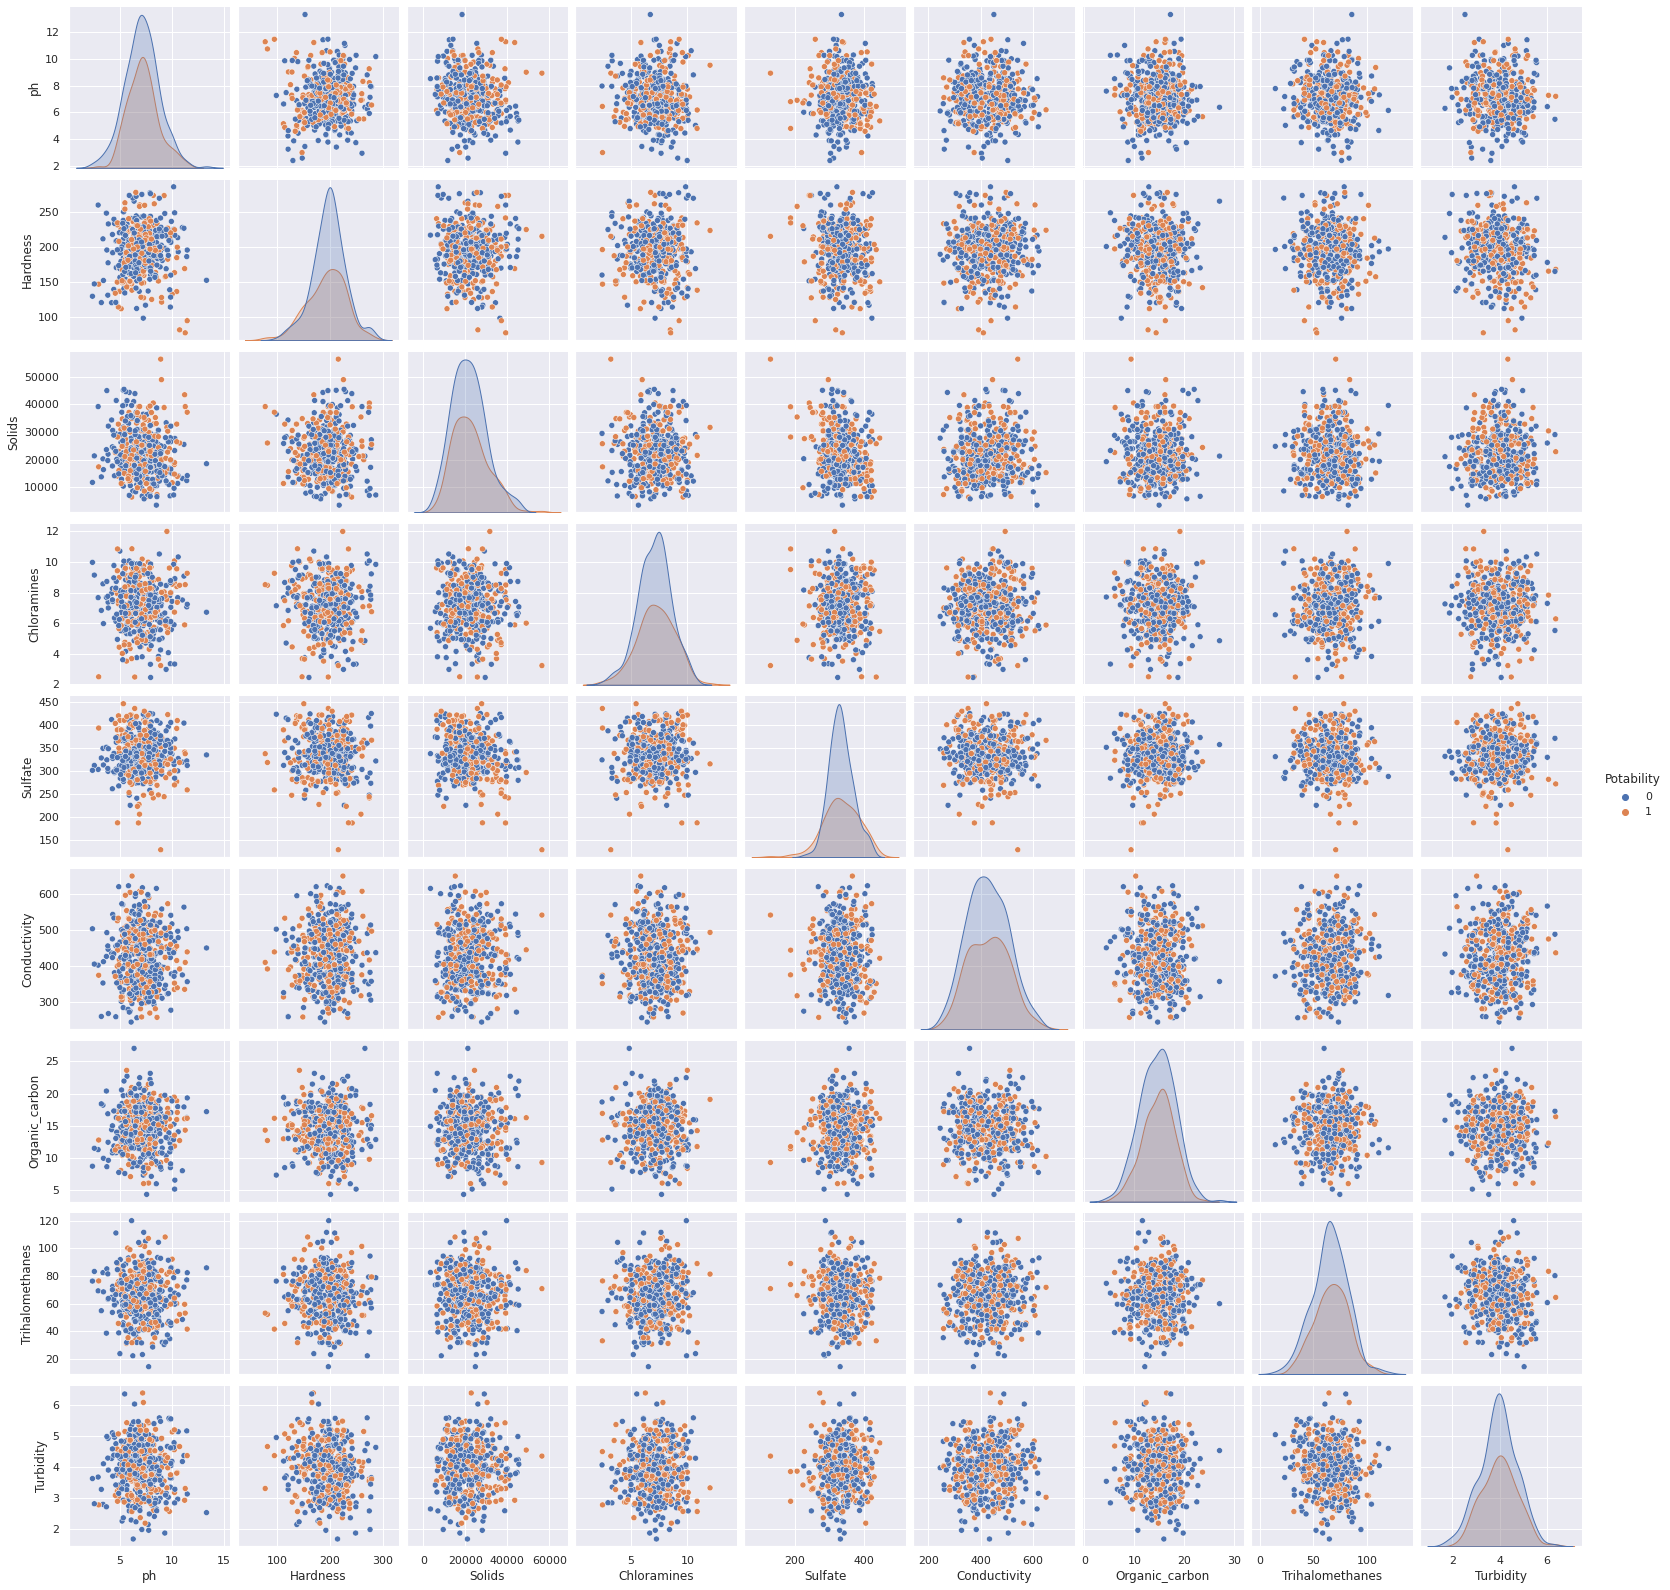

In [87]:
mini_data = data.sample(frac=1)[:500]
sns.pairplot(mini_data, hue='Potability')

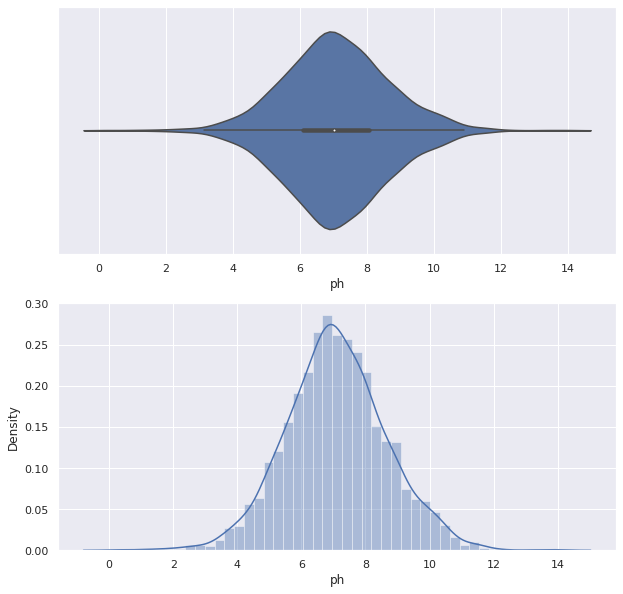

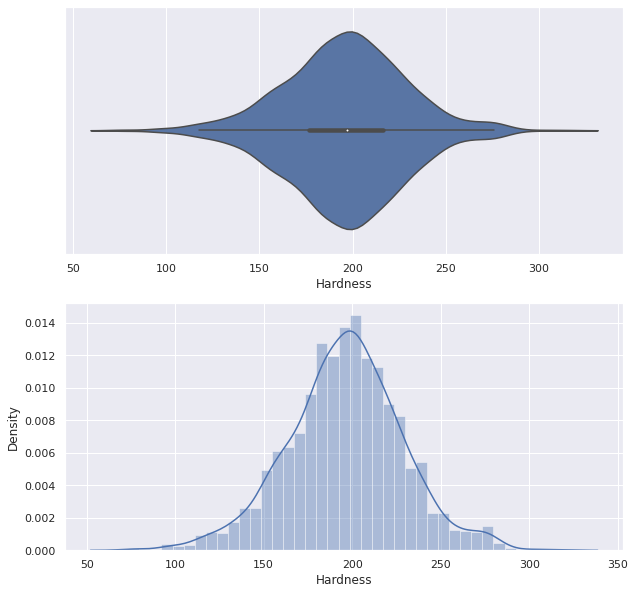

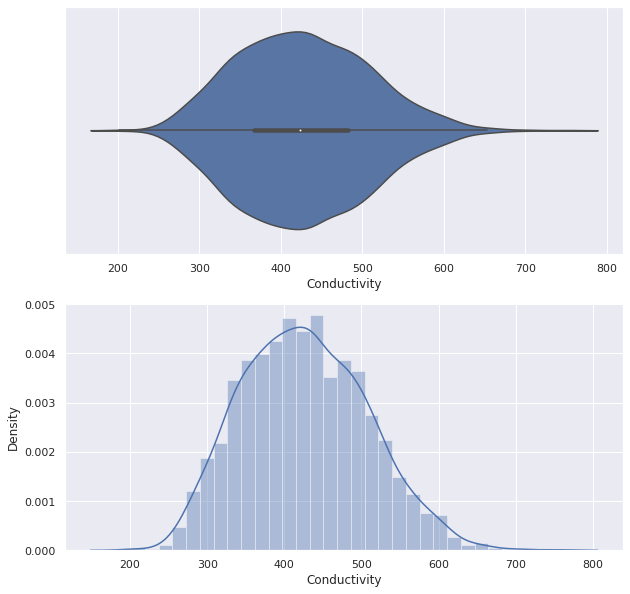

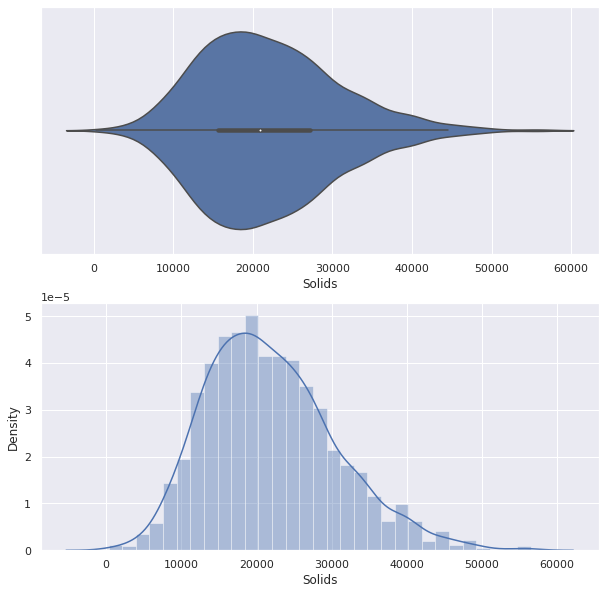

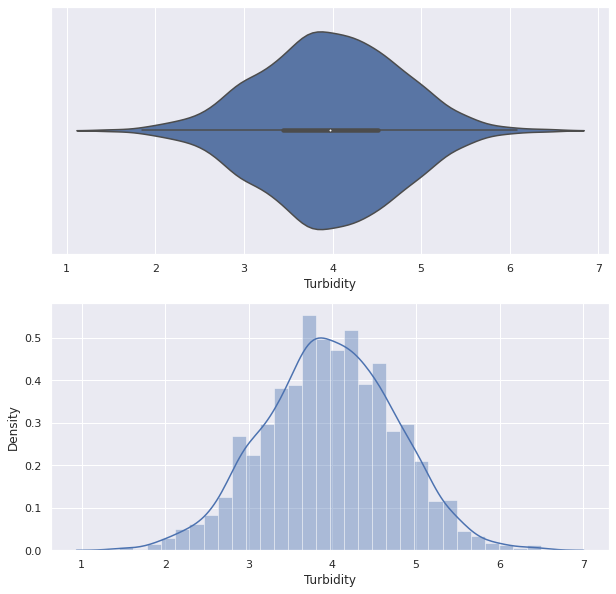

In [88]:
for col in ['ph', 'Hardness', 'Conductivity', 'Solids', 'Turbidity']:
    fig, ax = plt.subplots(2, 1, figsize=(10,10))
    sns.violinplot(ax=ax[0], x=data[col])
    sns.distplot(data[col], ax=ax[1])

<AxesSubplot:>

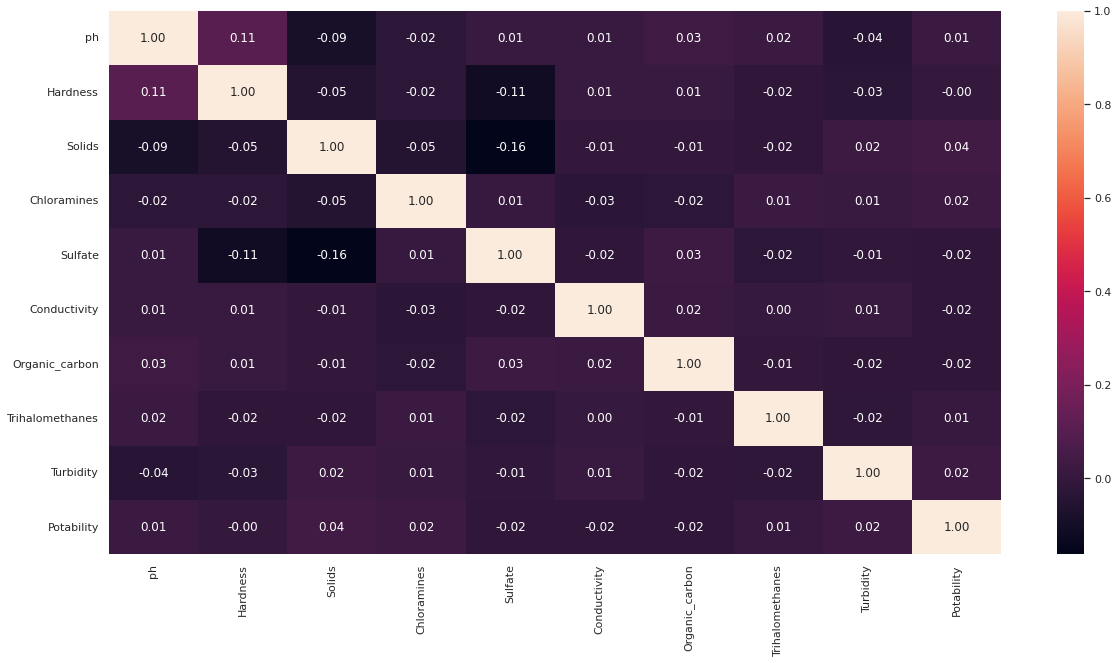

In [89]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

**В качестве метрик для решения задачи классификации будем использовать:**

Метрики, формируемые на основе матрицы ошибок:

**Метрика precision:**

Можно переводить как точность, но такой перевод совпадает с переводом метрики "accuracy".

$$ precision = \frac{TP}{TP+FP}$$



Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

Используется функция precision_score.

**Метрика recall (полнота):**

$$ recall= \frac{TP}{TP+FN} $$

Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

Используется функция recall_score.

Метрика F1-мера

Для того, чтобы объединить precision и recall в единую метрику используется $F_β$ - мера, которая вычисляется как среднее гармоническое от precision и recall:

$$ F_β=(1+β^2)⋅\frac{precision⋅recall}{precision+recall} $$

где $β$ определяет вес точности в метрике.

На практике чаще всего используют вариант F1-меры (которую часто называют F-мерой) при $β$=1:


$$ F_1=2⋅\frac{precision⋅recall}{precision+recall} $$

Для вычисления используется функция f1_score.

Метрика ROC AUC

Основана на вычислении следующих характеристик:

$$ true PR=\frac{TP}{TP+FN} $$

True Positive Rate, откладывается по оси ординат. Совпадает с recall.

$$ false PR=\frac{FP}{FP+TN} $$

False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

Для получения ROC AUC используется функция roc_auc_score.

In [90]:
class MetricLogger:

    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values

    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5,
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [91]:
X = data.drop('Potability', axis=1)
Y = data['Potability']

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [93]:
print(X_train.shape, X_test.shape)

(1608, 9) (403, 9)


In [94]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Построение базового решения для выбранных моделей без подбора гиперпараметров.

Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [95]:
models = {  'LogisticRegression': LogisticRegression(),
            'KNearestNeighbors': KNeighborsClassifier(n_neighbors=5),
            'DecisionTree': DecisionTreeClassifier(),
            'RandomForest': RandomForestClassifier(),
            'GradientBoost': GradientBoostingClassifier()}
accuracies = {}
clasMetricLogger = MetricLogger()

In [96]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [101]:
from sklearn.metrics import plot_confusion_matrix

def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(X_train,Y_train)
    # Предсказание значений
    Y_pred = model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]

    precision = precision_score(Y_test.values, Y_pred)
    recall = recall_score(Y_test.values, Y_pred)
    f1 = f1_score(Y_test.values, Y_pred)
    roc_auc = roc_auc_score(Y_test.values, Y_pred_proba)

    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    draw_roc_curve(Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, X_test, Y_test.values, ax=ax[1],
                      display_labels=['0','1'],
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

    print("==============================================================")
    print(model_name)
    print("==============================================================")
    print(classification_report(Y_test, Y_pred))


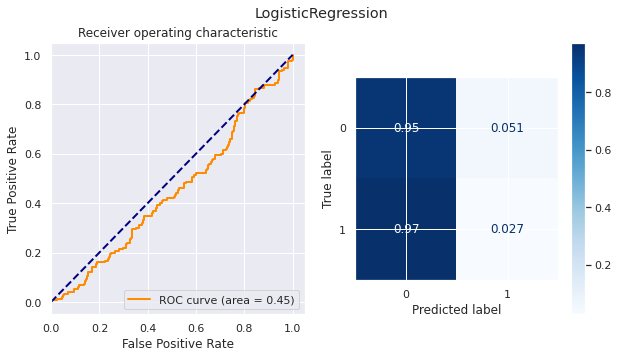

LogisticRegression
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       253
           1       0.24      0.03      0.05       150

    accuracy                           0.61       403
   macro avg       0.43      0.49      0.40       403
weighted avg       0.48      0.61      0.49       403



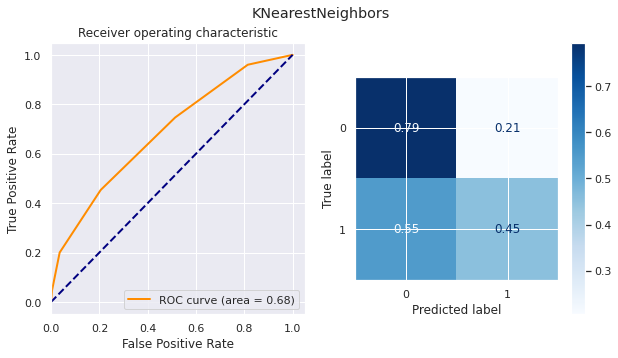

KNearestNeighbors
              precision    recall  f1-score   support

           0       0.71      0.79      0.75       253
           1       0.57      0.45      0.50       150

    accuracy                           0.67       403
   macro avg       0.64      0.62      0.63       403
weighted avg       0.66      0.67      0.66       403



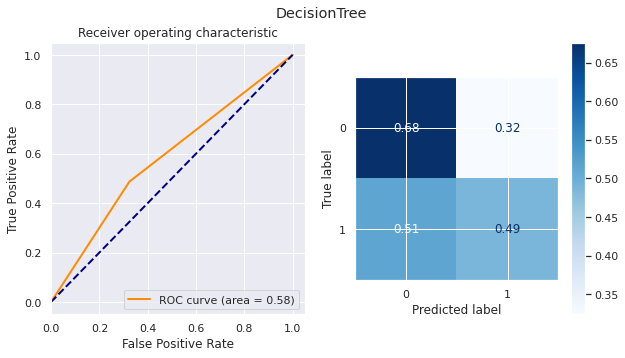

DecisionTree
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       253
           1       0.47      0.49      0.48       150

    accuracy                           0.61       403
   macro avg       0.58      0.58      0.58       403
weighted avg       0.61      0.61      0.61       403



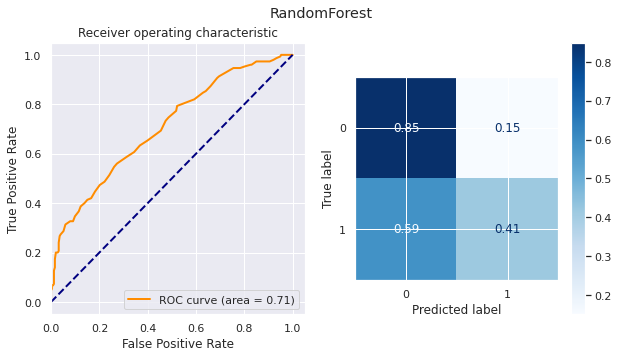

RandomForest
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       253
           1       0.62      0.41      0.50       150

    accuracy                           0.69       403
   macro avg       0.66      0.63      0.63       403
weighted avg       0.68      0.69      0.67       403



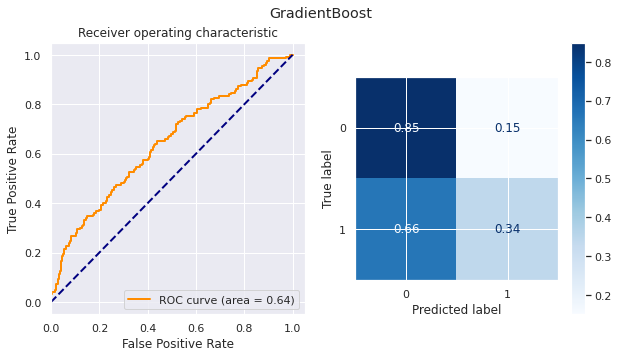

GradientBoost
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       253
           1       0.57      0.34      0.43       150

    accuracy                           0.66       403
   macro avg       0.63      0.59      0.59       403
weighted avg       0.64      0.66      0.63       403



In [110]:
for model_name, model in models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [105]:
n_range_list = list(range(0,1250,50))
n_range_list[0] = 1

In [114]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':n_range_list}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
               (RandomForestClassifier(),[{'n_estimators':n_range_list,'criterion':['gini','entropy'],'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':n_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]

for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'roc_auc',cv=5)
    grid.fit(X_train, Y_train)
    best_roc_auc = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest roc_auc: {:.2f}'.format(i,best_roc_auc))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best roc_auc: 0.52
Best Parameters :  {'C': 0.5, 'random_state': 0}

----------------

KNeighborsClassifier():
Best roc_auc: 0.66
Best Parameters :  {'n_neighbors': 100}

----------------

DecisionTreeClassifier():
Best roc_auc: 0.59
Best Parameters :  {'criterion': 'gini', 'random_state': 0}

----------------

RandomForestClassifier():
Best roc_auc: 0.70
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}

----------------

GradientBoostingClassifier():
Best roc_auc: 0.68
Best Parameters :  {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 0}

----------------



In [119]:
params_models = {  'LogisticRegressionBest': LogisticRegression(C = 0.25, random_state= 0),
            'KNearestNeighborsBest': KNeighborsClassifier(n_neighbors=50),
            'DecisionTreeBest': DecisionTreeClassifier(criterion='entropy',random_state=0),
            'RandomForestBest': RandomForestClassifier(criterion='gini',n_estimators=1050,random_state=0),
            'GradientBoostBest': GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.1,loss='deviance',n_estimators=100,random_state=0)}

params_accuracies = {}
params_precision = {}
params_recall = {}
params_f1 = {}
params_roc_auc = {}

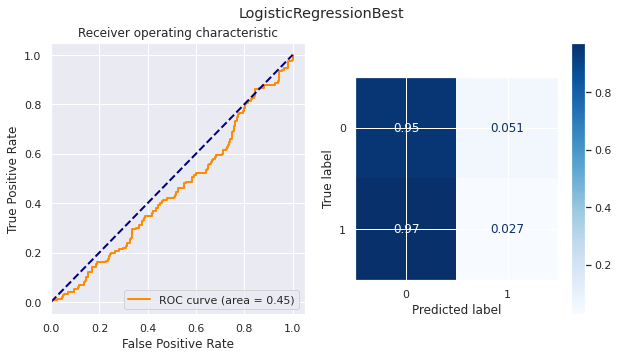

LogisticRegressionBest
              precision    recall  f1-score   support

           0       0.62      0.95      0.75       253
           1       0.24      0.03      0.05       150

    accuracy                           0.61       403
   macro avg       0.43      0.49      0.40       403
weighted avg       0.48      0.61      0.49       403



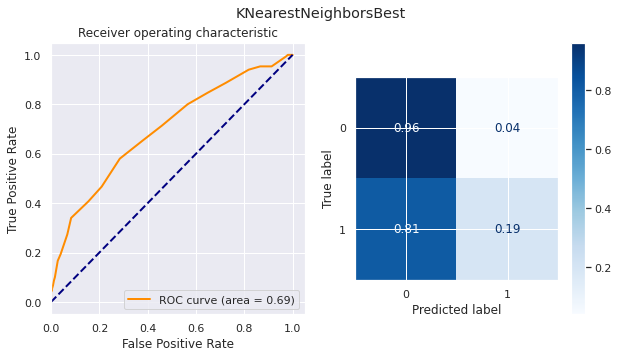

KNearestNeighborsBest
              precision    recall  f1-score   support

           0       0.67      0.96      0.79       253
           1       0.74      0.19      0.31       150

    accuracy                           0.67       403
   macro avg       0.71      0.58      0.55       403
weighted avg       0.70      0.67      0.61       403



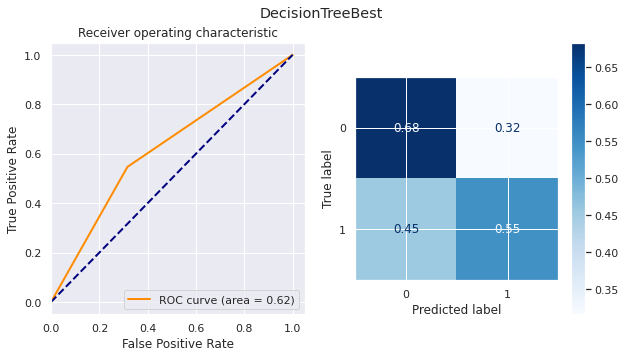

DecisionTreeBest
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       253
           1       0.51      0.55      0.53       150

    accuracy                           0.63       403
   macro avg       0.61      0.62      0.61       403
weighted avg       0.64      0.63      0.64       403



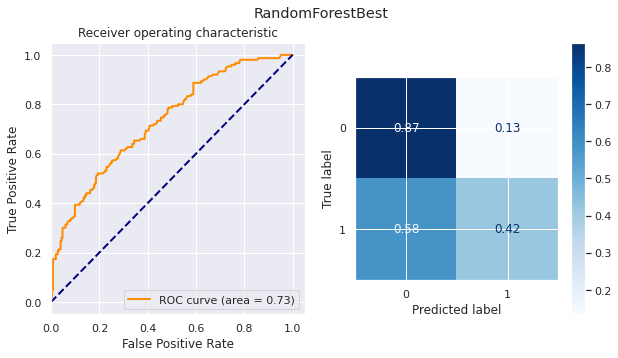

RandomForestBest
              precision    recall  f1-score   support

           0       0.72      0.87      0.78       253
           1       0.65      0.42      0.51       150

    accuracy                           0.70       403
   macro avg       0.68      0.64      0.65       403
weighted avg       0.69      0.70      0.68       403



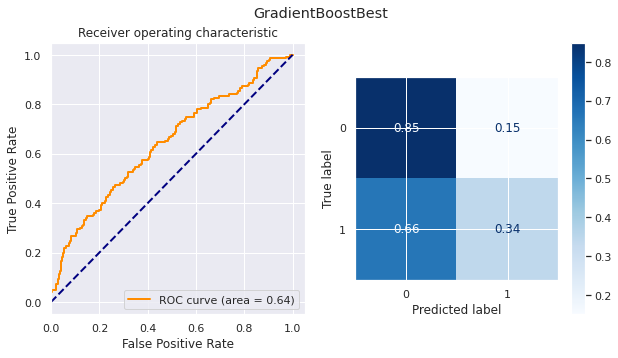

GradientBoostBest
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       253
           1       0.57      0.34      0.43       150

    accuracy                           0.66       403
   macro avg       0.63      0.59      0.59       403
weighted avg       0.64      0.66      0.63       403



In [120]:
for model_name, model in params_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

In [121]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

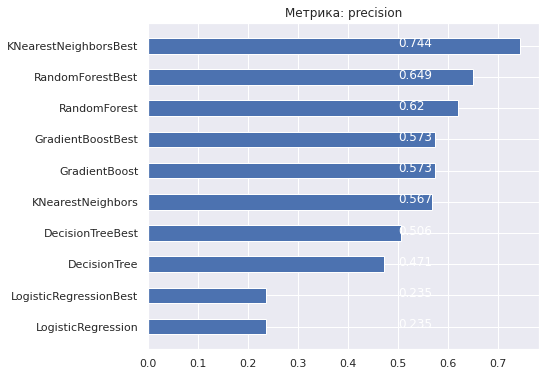

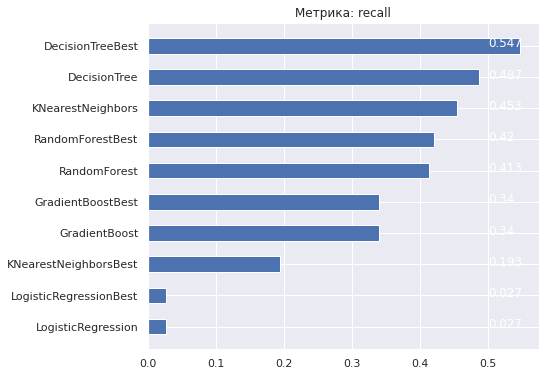

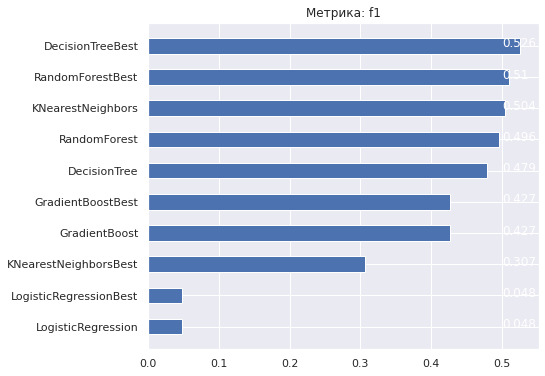

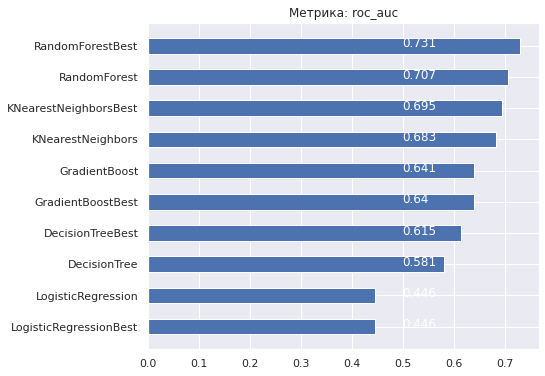

In [122]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

Вывод: на основании двух метрик из четырех используемых, лучшей оказалась модель решающего дерева.